In [1]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset
df=pd.read_csv("food_data.csv")
df.head()
df.shape


(31700, 16)

In [3]:
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [4]:
df.describe(exclude='float')

,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
count,31700,31700,31700,31700,31700
unique,4,4,2,2,10
top,snack,baked,False,False,Pizza
freq,8001,8048,28000,19500,6000


In [5]:
df.head(10)

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
5,264.565349,13.211820,13.835274,35.048055,5.918733,2.403751,666.134441,43.988950,64.200334,41.459704,178.408325,breakfast,raw,False,False,Burger
6,229.263615,2.187771,9.844101,26.820159,22.261039,0.549310,72.662463,29.365213,66.916522,50.411927,100.815475,snack,baked,False,True,Ice Cream
7,188.765957,2.486270,9.479713,21.365235,19.171841,0.673345,86.428561,36.619752,59.062833,54.007529,89.068188,breakfast,grilled,False,True,Ice Cream
8,342.055223,28.252271,28.557273,0.000000,0.000000,0.000000,87.904401,79.949005,0.957229,54.259188,192.960366,snack,grilled,False,True,Steak
9,349.875140,14.279346,17.966512,33.325020,6.907501,0.444209,740.477217,32.609281,75.015328,48.580038,174.061567,breakfast,raw,False,False,Burger


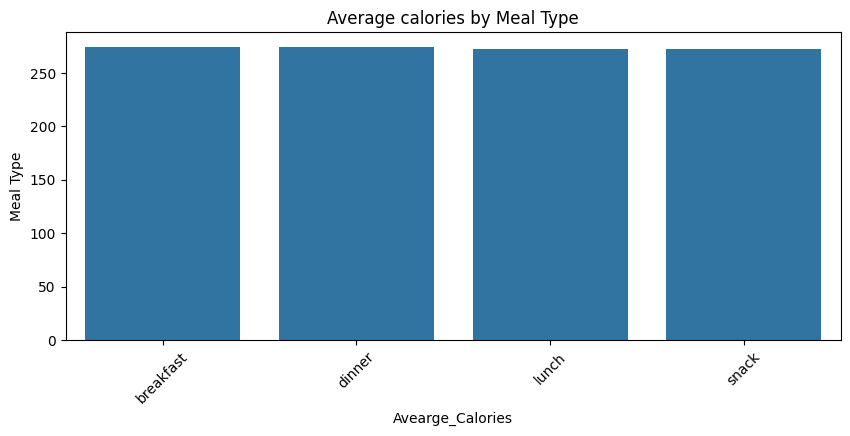

In [6]:
plt.figure(figsize=(10,4))
sns.barplot(df.groupby("Meal_Type")["Calories"].mean())
plt.title("Average calories by Meal Type")
plt.xlabel("Avearge_Calories")
plt.ylabel("Meal Type")
plt.xticks(rotation=45)
plt.show()

NULL VALUES TREATMENT

In [7]:
#Controlling null values in the data 
df.isnull().sum()
#Calculating the percentage of null values in each column
df.isnull().mean()*100

Calories              1.182965
Protein               1.182965
Fat                   1.182965
Carbs                 1.182965
Sugar                 1.182965
Fiber                 1.182965
Sodium                1.182965
Cholesterol           1.182965
Glycemic_Index        1.182965
Water_Content         1.182965
Serving_Size          1.182965
Meal_Type             0.000000
Preparation_Method    0.000000
Is_Vegan              0.000000
Is_Gluten_Free        0.000000
Food_Name             0.000000
dtype: float64

In [8]:
#Only a small number of null values is present in the dataset, so i decided to drop them.
#dropping rows with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31325 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31325 non-null  object 
 12  Preparation_Method  31325 non-null  object 
 13  Is_Vegan            31325 non-null  bool   
 14  Is_Gluten_Free      31325 non-null  bool   
 15  Food_Name           31325 non-null  object 
dtypes: bool(2

In [9]:
#Number of catagorical variables and continuous variables
num_var=df.select_dtypes(include=['float64', 'int64']).columns
cat_vars = df.select_dtypes(include=['object','bool']).columns  
print(num_var,len(num_var))
print(cat_vars,len(cat_vars))   


Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object') 11
Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object') 5


Distribution of continous variable

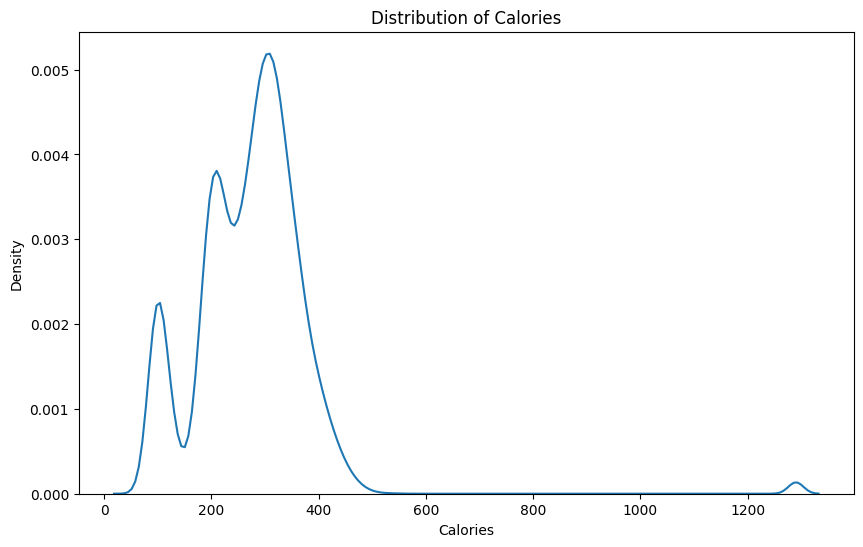

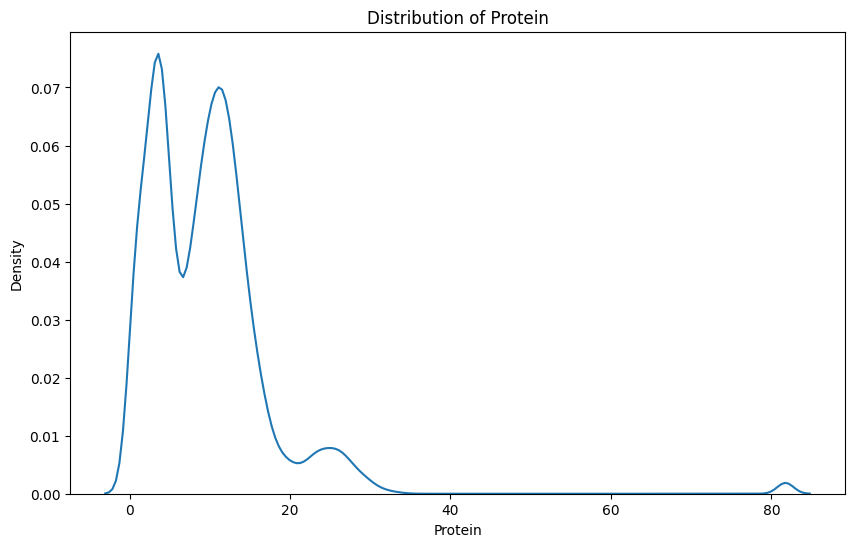

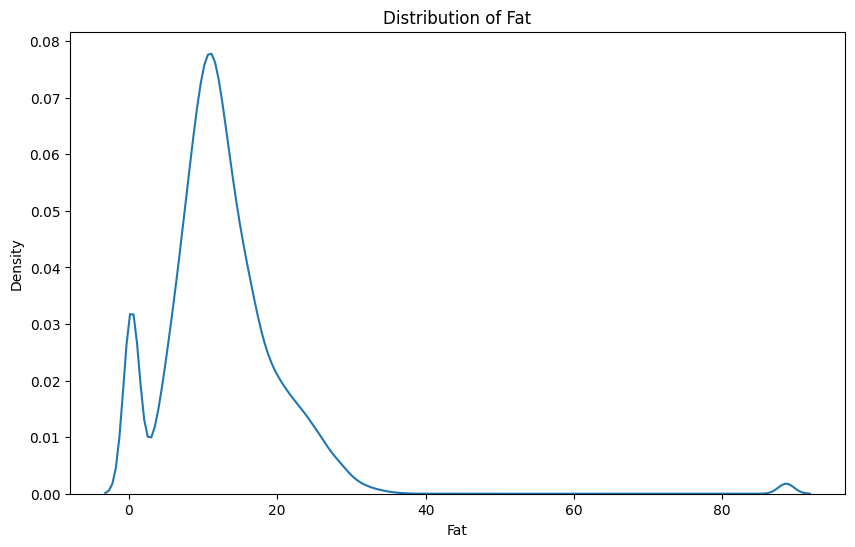

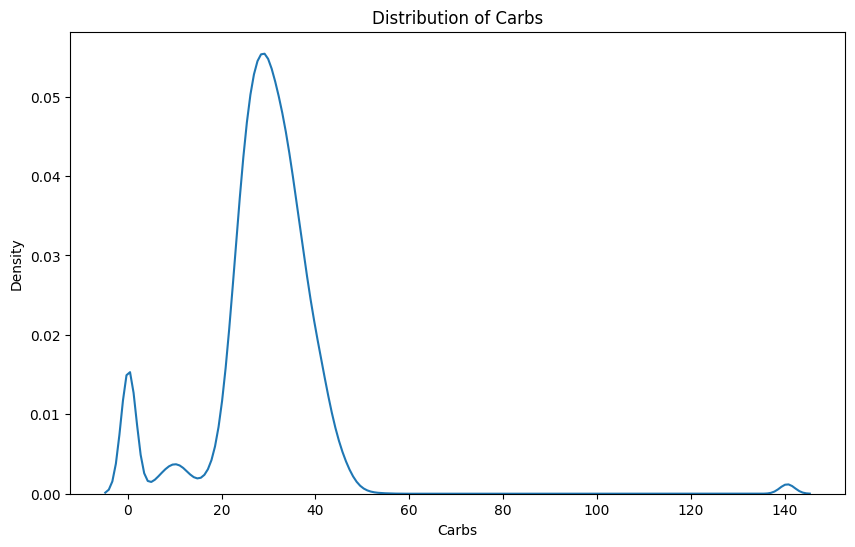

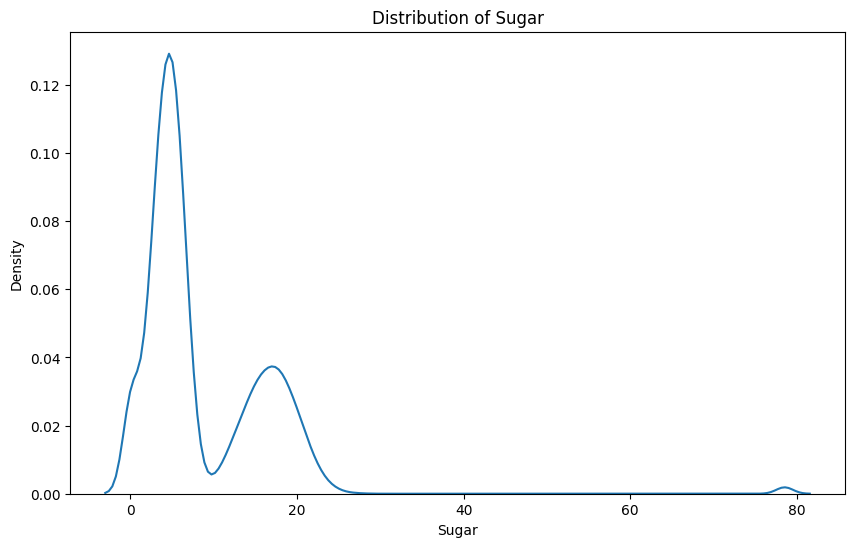

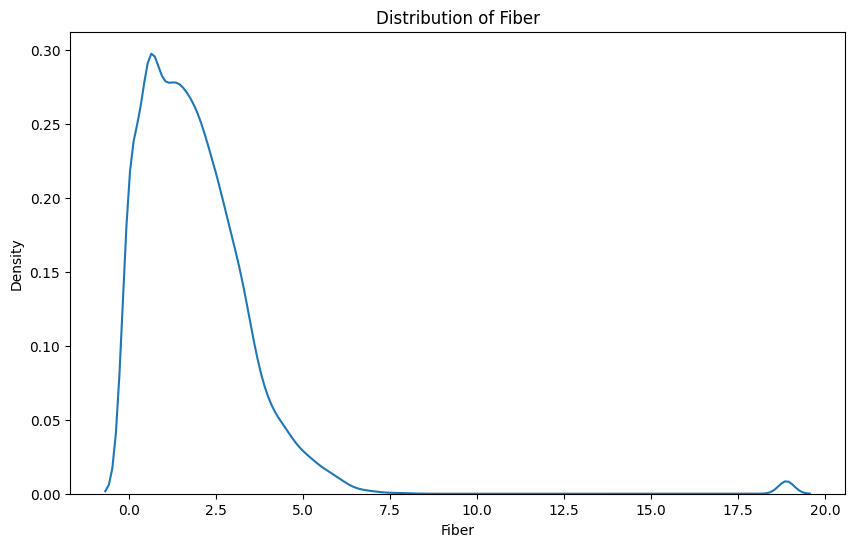

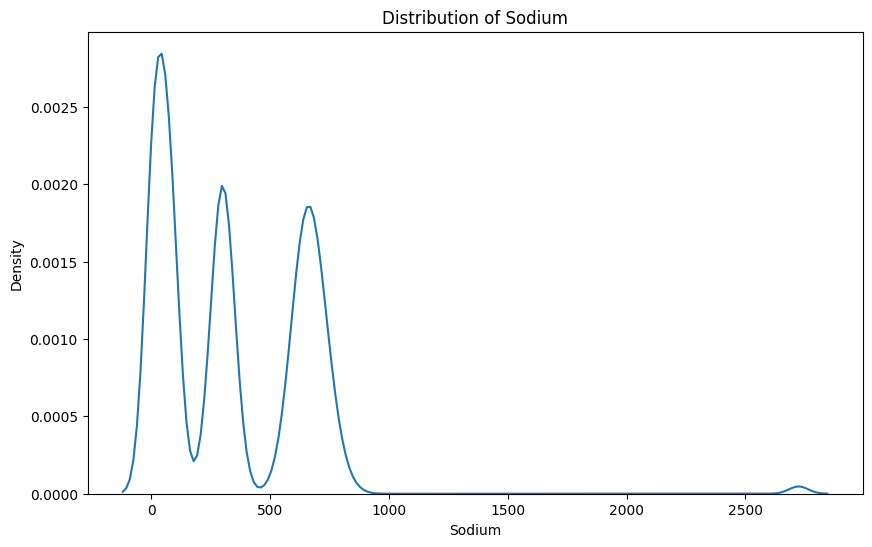

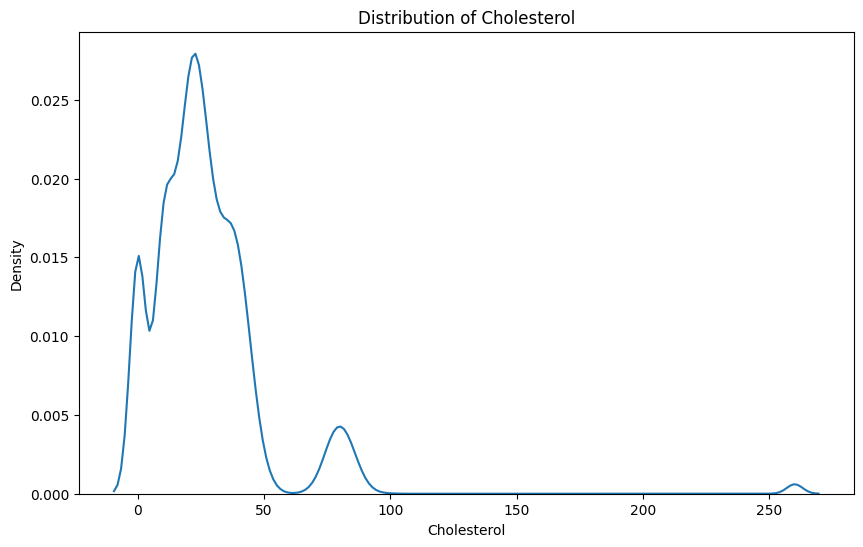

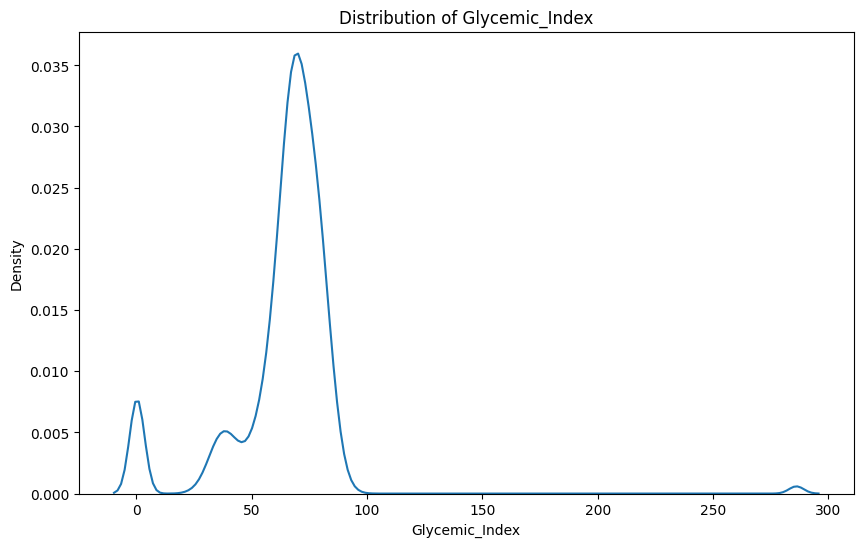

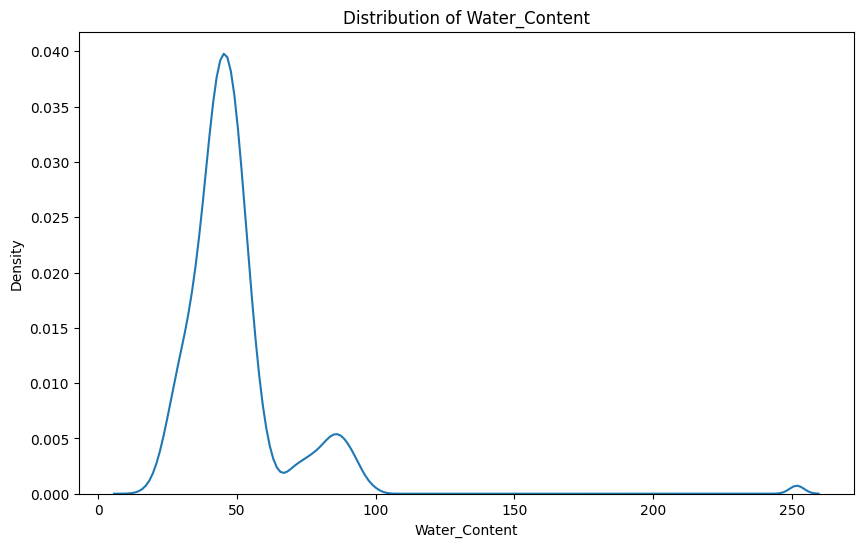

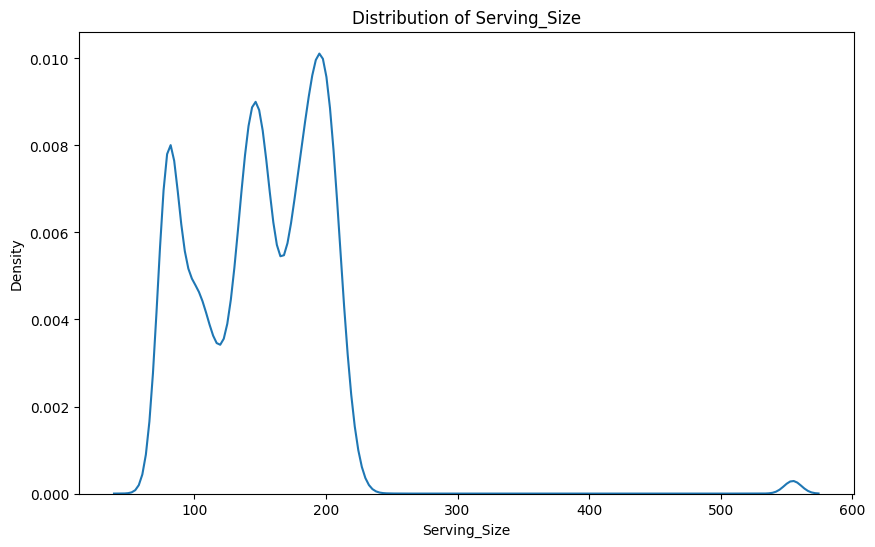

In [10]:
# Class distribution
for i in df.columns:
    if df[i].dtype != 'object' and df[i].dtype != bool:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(x=df[i])
        plt.title(f'Distribution of {i}')
        plt.show()

Distribution of catagorical variables 

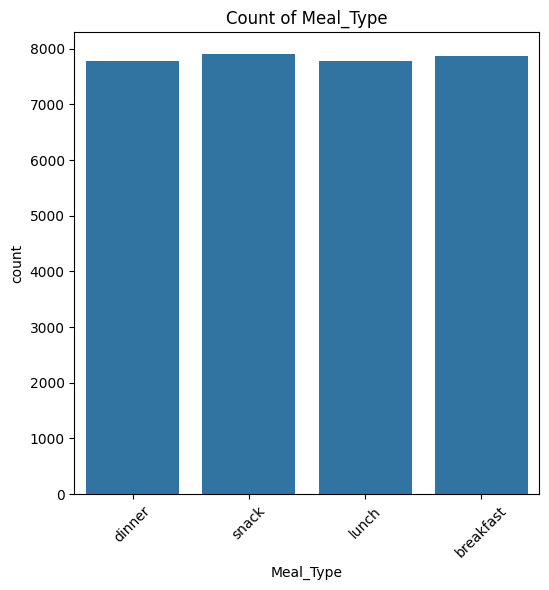

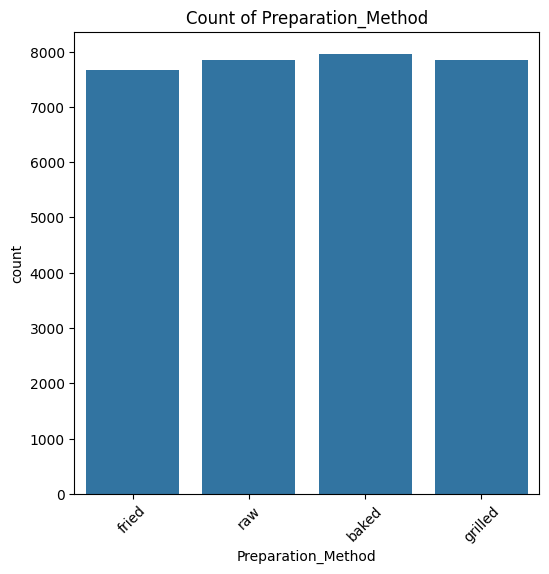

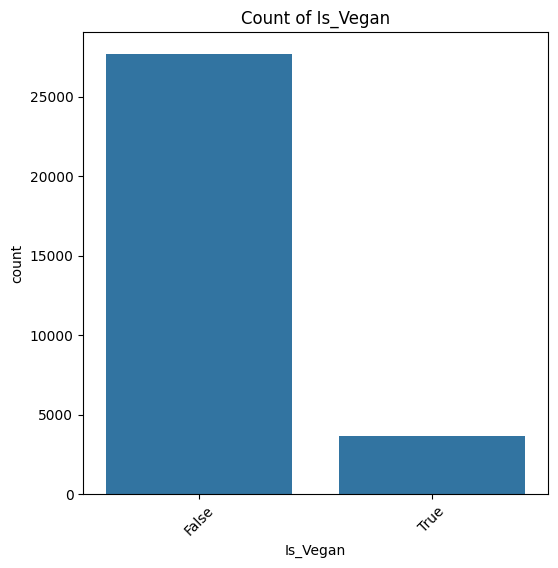

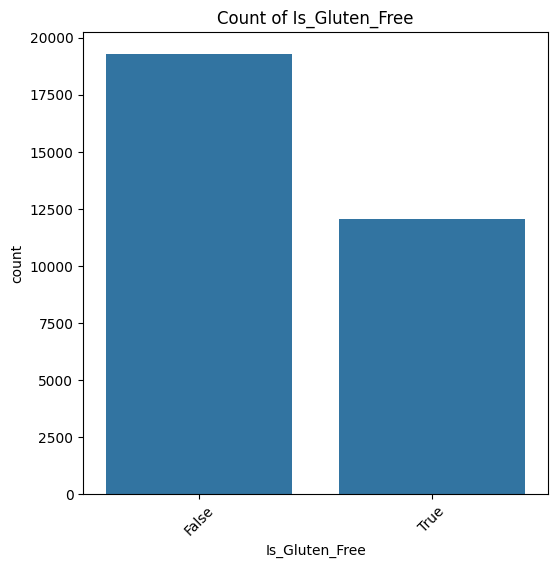

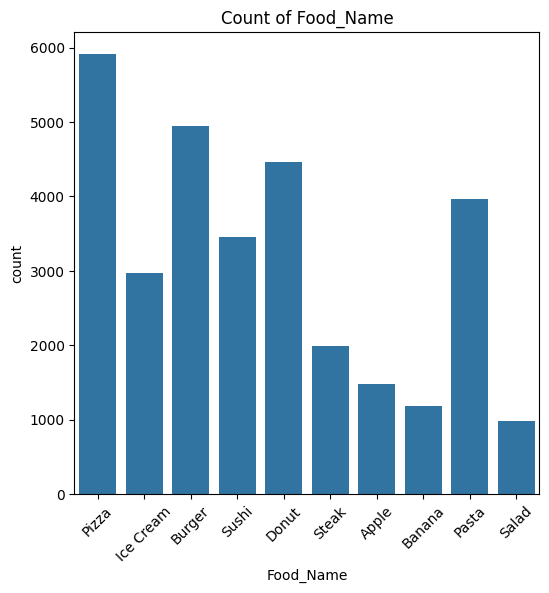

In [11]:
for i in df.columns:
    if df[i].dtype =='object' or df[i].dtype ==bool:
        plt.figure(figsize=(6, 6))
        sns.countplot(x=df[i])
        plt.title(f'Count of {i}')
        plt.xticks(rotation=45)
        plt.show()

Outliers treatment

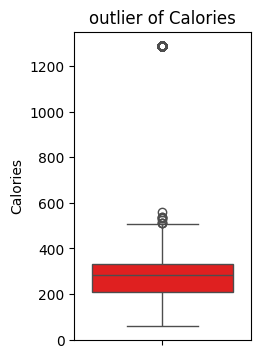

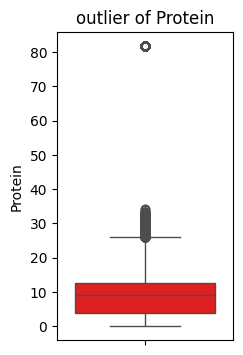

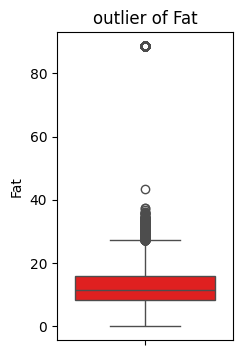

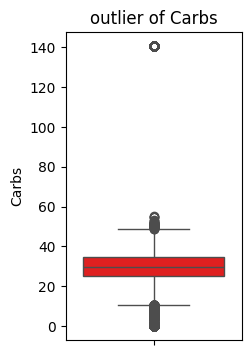

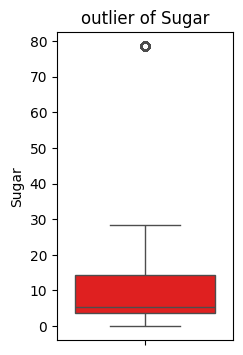

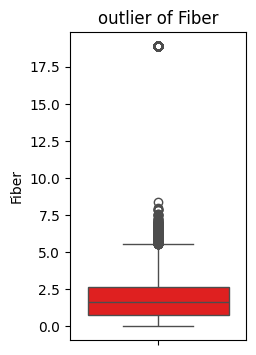

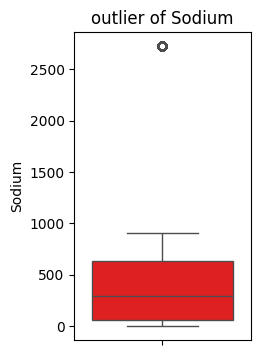

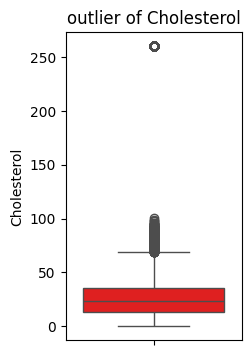

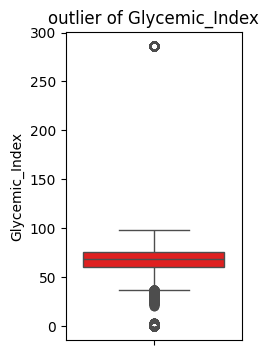

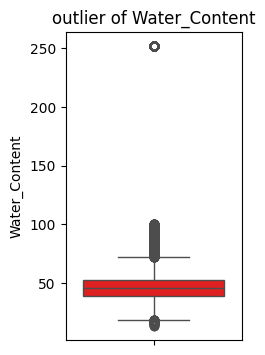

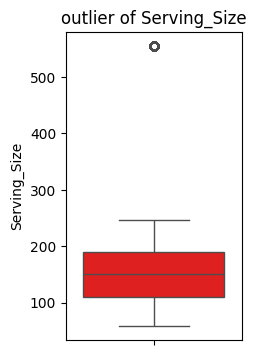

In [12]:
for i in df.columns:
        if df[i].dtype == "float64":
            plt.figure(figsize=(5, 4))
            plt.subplot(1,2, 1)
            plt.title(f'outlier of {i}')
            sns.boxplot(df[i], color='red')
            plt.show()

In [13]:
df["Is_Vegan"].value_counts()

Is_Vegan
False    27682
True      3643
Name: count, dtype: int64

CAPPING THE OUTLIERS

In [14]:
import pandas as pd
import numpy as np 
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df[df.select_dtypes(include=np.number).columns] = df.select_dtypes(include=np.number).apply(cap_outliers)


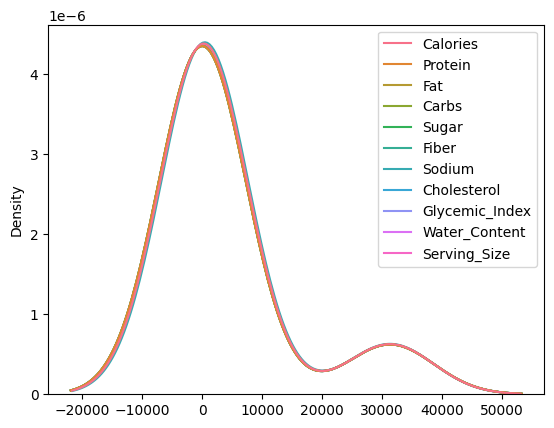

<Figure size 1000x600 with 0 Axes>

In [15]:
sns.kdeplot(df.describe(include='Float64'))
plt.figure(figsize=(10, 6))
plt.show()

checking and removing duplicate enteries in the data set

In [16]:
#duplicate values in the data 
df.duplicated().sum()

np.int64(65)

In [17]:
#Droping duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

 STANDARTIZING NUMERICAL FEATURES

In [18]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1= scaler.fit_transform(df.select_dtypes(include=np.number))

In [19]:
df.select_dtypes(include="float64")

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474
...,...,...,...,...,...,...,...,...,...,...,...
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,72.507408,120.293342
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098


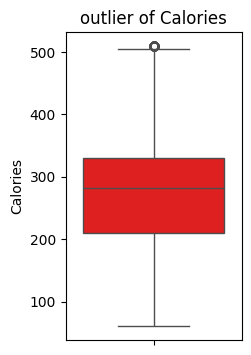

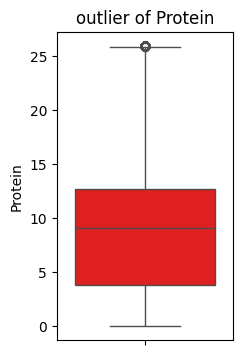

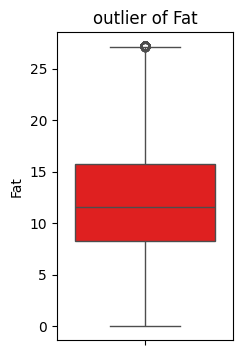

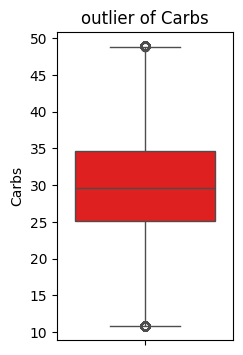

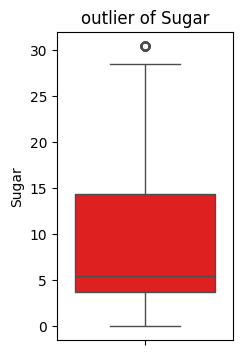

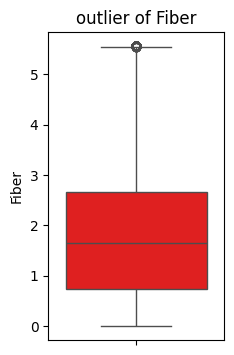

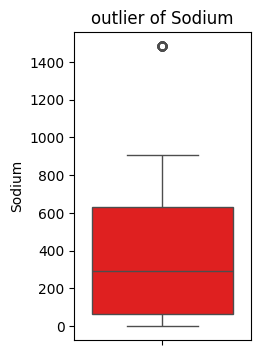

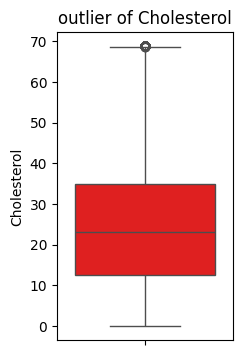

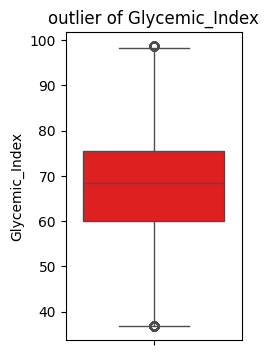

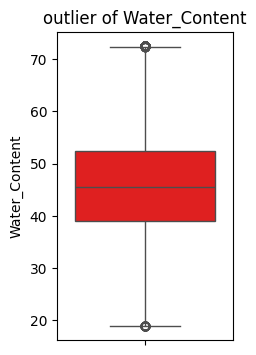

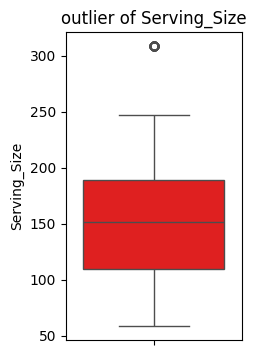

In [20]:
for i in df.columns:
    if df[i].dtype == "float64":
        plt.figure(figsize=(5, 4))
        plt.subplot(1,2, 1)
        plt.title(f'outlier of {i}')
        sns.boxplot(df[i], color='red')
        plt.show()

------
------ 

Catagorical variables 

In [21]:
cat_vars

Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [22]:
# Decideing encoding method for categorical variables
print(df["Meal_Type"].unique())
print(df["Preparation_Method"].unique())
print(df['Is_Vegan'].unique())

['dinner' 'snack' 'lunch' 'breakfast']
['fried' 'raw' 'baked' 'grilled']
[False  True]


In [23]:
print(df["Is_Gluten_Free"].unique())
print(df["Food_Name"].unique())

[False  True]
['Pizza' 'Ice Cream' 'Burger' 'Sushi' 'Donut' 'Steak' 'Apple' 'Banana'
 'Pasta' 'Salad']


-------
-------

# Feature engineering

Encoding of catagorical variable

In [24]:
# SINCE IT IS A BOOLEAN ENCODING, I WILL REPLACE TRUE AND FALSE WITH 1 AND 0
df["Is_Vegan"].replace({True:1,False:0},inplace=True)
df["Is_Gluten_Free"].replace({True:1,False:0},inplace=True)

C:\Users\vinoth kanna\AppData\Local\Temp\ipykernel_4748\3177711828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Is_Vegan"].replace({True:1,False:0},inplace=True)
C:\Users\vinoth kanna\AppData\Local\Temp\ipykernel_4748\3177711828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Is_V

In [25]:
#Label encodeing the categorical variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = le.fit_transform(df[i])
# Checking the data after encoding
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,1,1,0,0,6
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,3,3,0,1,4
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,3,3,0,0,2
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,2,1,0,1,9
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,3,0,0,0,3


In [26]:
#Converting the data to csv file for further use
df1=df.to_csv("final_data.csv",index=False)

feature importance based on ensamble model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
val= df.drop(columns=['Food_Name'])
tar=df["Food_Name"]

In [28]:
Fs= RandomForestClassifier(n_estimators=250 ,random_state=42)
Fs.fit(val,tar)

RandomForestClassifier(n_estimators=250, random_state=42)

In [29]:
Fs.feature_importances_

array([0.05357922, 0.07025287, 0.05235288, 0.04177592, 0.09763623,
       0.01992993, 0.16600107, 0.12787574, 0.07630105, 0.04687041,
       0.14045767, 0.00078256, 0.00080356, 0.01789593, 0.08748497])

In [35]:
#Dataframe of feature importance
Df=pd.DataFrame({
      "Columns": val.columns,
    "Score": Fs.feature_importances_ * 100
}).sort_values("Score", ascending = False)

In [31]:
#we wil select the top 9 features based on the feature importance score
top_features = pd.DataFrame({
    "Columns": val.columns,
    "Score": Fs.feature_importances_ * 100
}).sort_values("Score", ascending=False).head(9)
top_features.Columns

6             Sodium
10      Serving_Size
7        Cholesterol
4              Sugar
14    Is_Gluten_Free
8     Glycemic_Index
1            Protein
0           Calories
2                Fat
Name: Columns, dtype: object

C:\Users\vinoth kanna\AppData\Local\Temp\ipykernel_4748\501504988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="Columns", data=Df, palette="viridis")


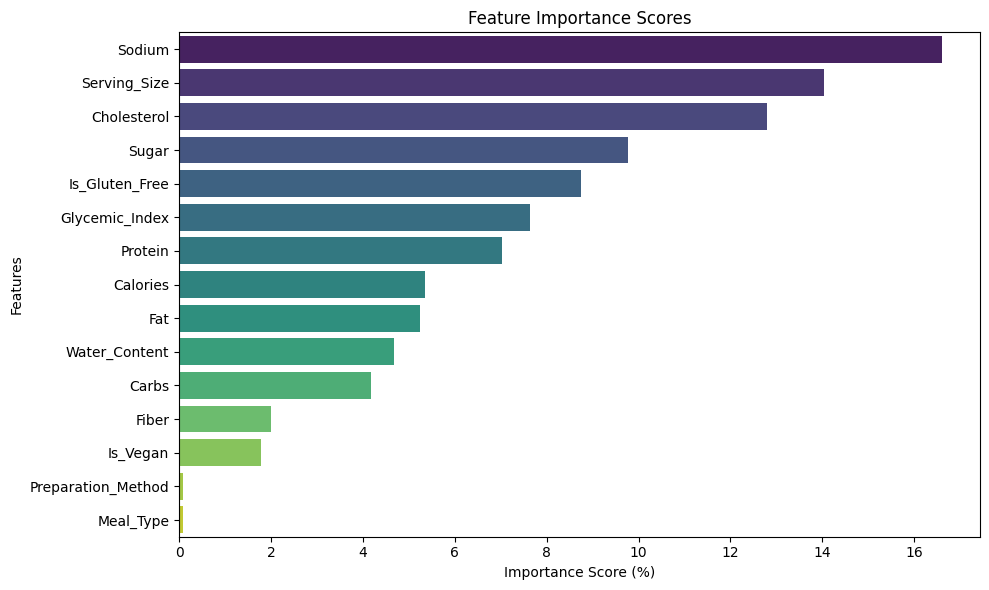

In [38]:
#plots on important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Score", y="Columns", data=Df, palette="viridis")
plt.title("Feature Importance Scores")
plt.xlabel("Importance Score (%)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

-----
#
-----

# THE PREPROCESSING AND EDA STEP ARE COMPLETED WE MOVE ONTO MODEL BUILDING